In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [2]:
df_nf50= yf.Ticker("^NSEI").history(period='5y').reset_index()
df_bajf= yf.Ticker("BAJFINANCE.NS").history(period='5y').reset_index()
df_hcl= yf.Ticker("HCLTECH.NS").history(period='5y').reset_index()
df_deepak= yf.Ticker("DEEPAKNTR.NS").history(period='5y').reset_index()
df_navin= yf.Ticker("NAVINFLUOR.NS").history(period='5y').reset_index()
df_bankn= yf.Ticker("^NSEBANK").history(period='5y').reset_index()

In [3]:
tech_list = ['^NSEI', 'BAJFINANCE.NS', 'HCLTECH.NS', 'DEEPAKNTR.NS', 'NAVINFLUOR.NS', '^NSEBANK']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [4]:
#company_list = [NIFTY50, BAJFIN, HCL, DEEPAK, NAVIN, BANKN]
#company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

In [5]:
type(df_deepak)

pandas.core.frame.DataFrame

In [6]:
company_list = []

In [7]:
company_list.append(yf.Ticker("^NSEI").history(period='5y').reset_index())

In [8]:
company_list.append(yf.Ticker("BAJFINANCE.NS").history(period='5y').reset_index())

In [9]:
company_list.append(yf.Ticker("HCLTECH.NS").history(period='5y').reset_index())
company_list.append(yf.Ticker("DEEPAKNTR.NS").history(period='5y').reset_index())
company_list.append(yf.Ticker("NAVINFLUOR.NS").history(period='5y').reset_index())
company_list.append(yf.Ticker("^NSEBANK").history(period='5y').reset_index())

In [10]:
print(company_list)

[           Date          Open          High           Low         Close  \
0    2017-01-18   8403.849609   8460.299805   8397.400391   8417.000000   
1    2017-01-19   8418.400391   8445.150391   8404.049805   8435.099609   
2    2017-01-20   8404.349609   8423.650391   8340.950195   8349.349609   
3    2017-01-23   8329.599609   8404.150391   8327.200195   8391.500000   
4    2017-01-24   8407.049805   8480.950195   8398.150391   8475.799805   
...         ...           ...           ...           ...           ...   
1226 2022-01-12  18170.400391  18227.949219  18128.800781  18212.349609   
1227 2022-01-13  18257.000000  18272.250000  18163.800781  18257.800781   
1228 2022-01-14  18185.000000  18286.949219  18119.650391  18255.750000   
1229 2022-01-17  18235.650391  18321.550781  18228.750000  18308.099609   
1230 2022-01-18  18337.199219  18350.949219  18085.900391  18113.050781   

      Volume  Dividends  Stock Splits  
0     163800          0             0  
1     165900      

In [11]:
Dict = {"nf50":0, "bajf":1, "hcl":2, "deepak":3 , "navin":4, "bankn":5}

In [12]:
company_name = ["nf50","bajf","hcl","deepak","navin","bankn"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

In [13]:
df = pd.concat(company_list, axis=0)
df.tail(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,company_name
1219,2022-01-05,36943.550781,37862.398438,36756.351562,37695.898438,237400,0.0,0.0,bankn
1220,2022-01-06,37242.550781,37752.500000,37058.449219,37490.250000,199000,0.0,0.0,bankn
1221,2022-01-07,37667.050781,38134.851562,37427.800781,37739.601562,183300,0.0,0.0,bankn
1222,2022-01-10,37930.550781,38400.351562,37929.351562,38347.898438,206500,0.0,0.0,bankn
1223,2022-01-11,38370.000000,38504.601562,38031.750000,38442.199219,159500,0.0,0.0,bankn
1224,2022-01-12,38719.601562,38851.449219,38604.601562,38727.550781,156100,0.0,0.0,bankn
1225,2022-01-13,38717.550781,38717.550781,38376.148438,38469.949219,159200,0.0,0.0,bankn
1226,2022-01-14,38302.351562,38448.050781,38007.750000,38370.398438,148600,0.0,0.0,bankn
1227,2022-01-17,38212.550781,38617.500000,38138.250000,38216.148438,140300,0.0,0.0,bankn
1228,2022-01-18,38337.398438,38855.550781,38095.398438,38210.300781,0,0.0,0.0,bankn


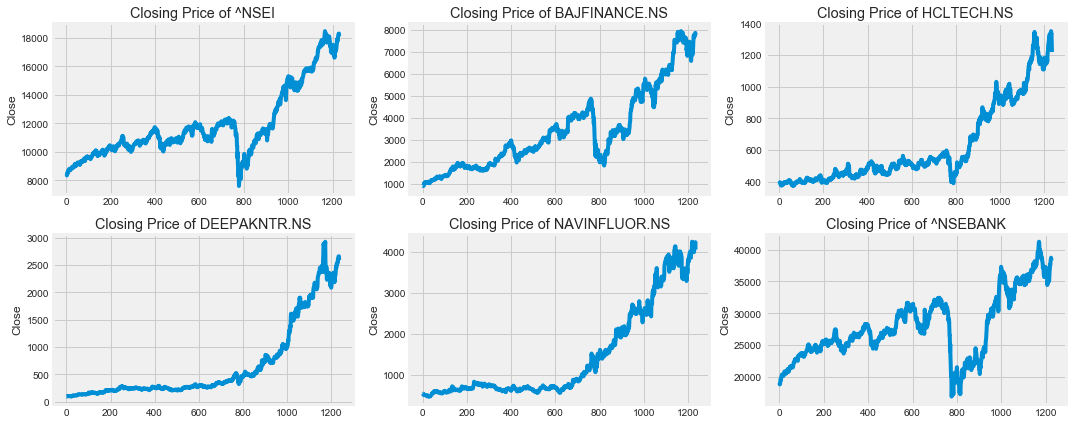

In [14]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 3, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i-1]}")
    
plt.tight_layout()


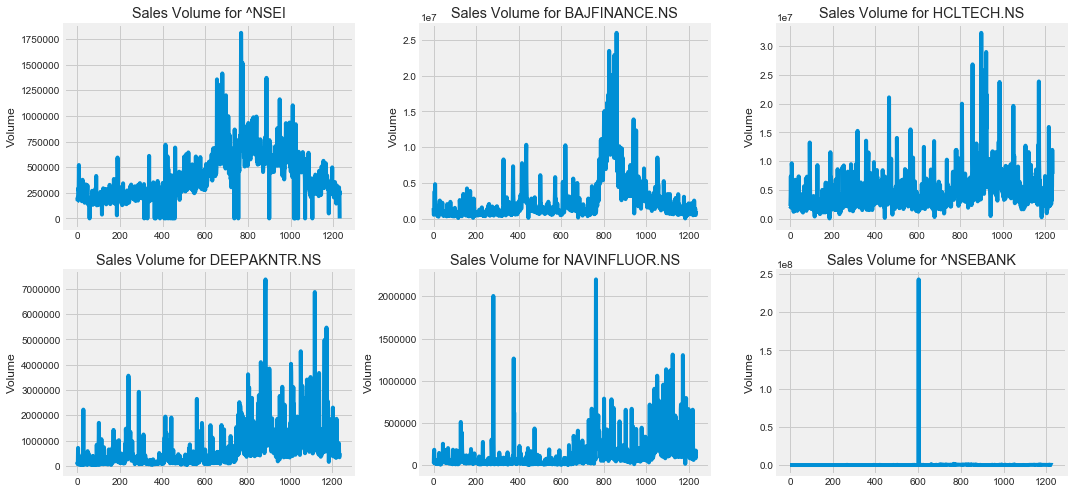

In [15]:
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 3, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

In [16]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()

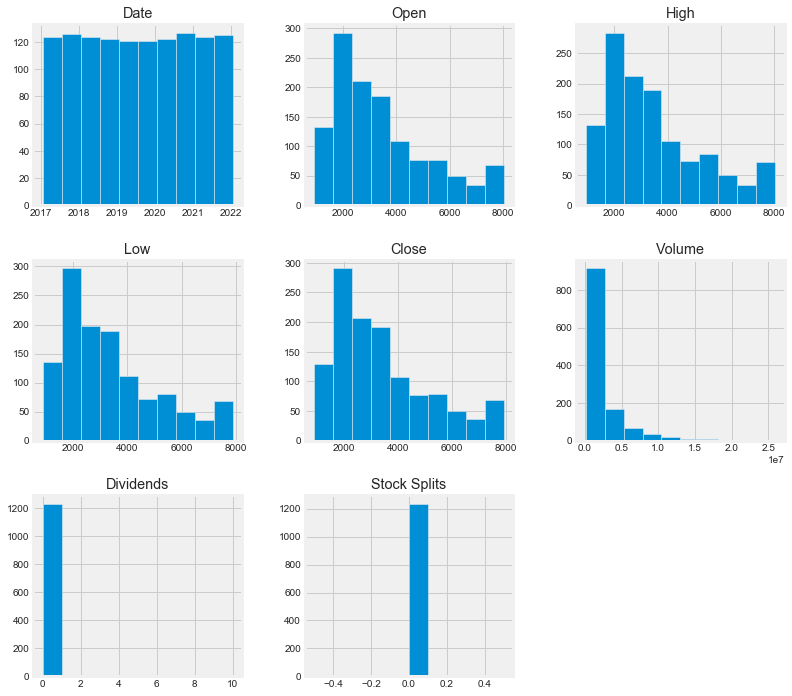

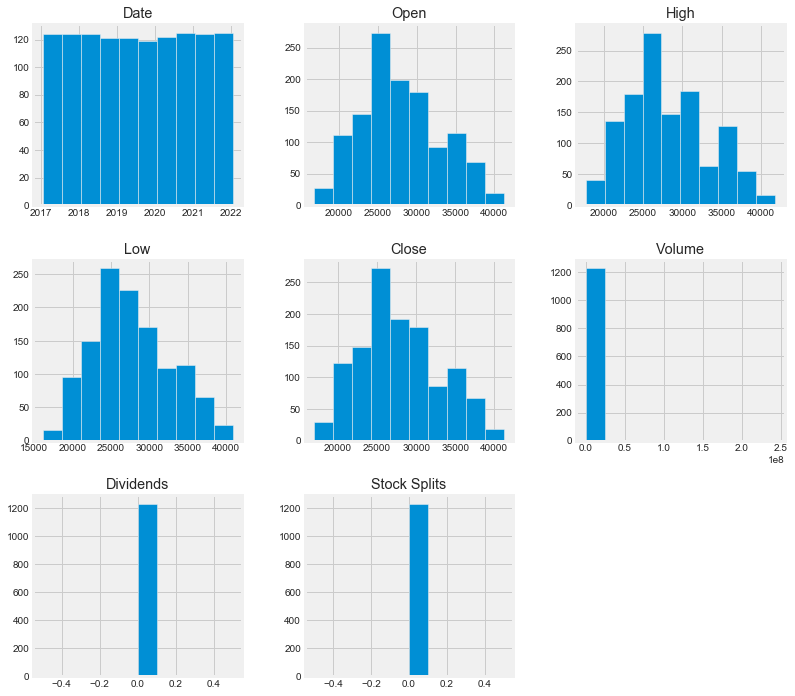

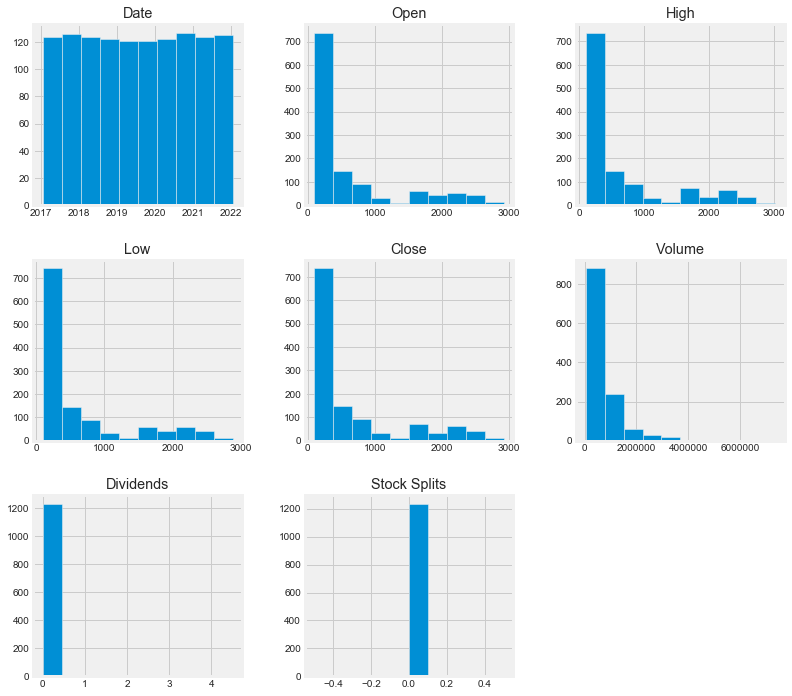

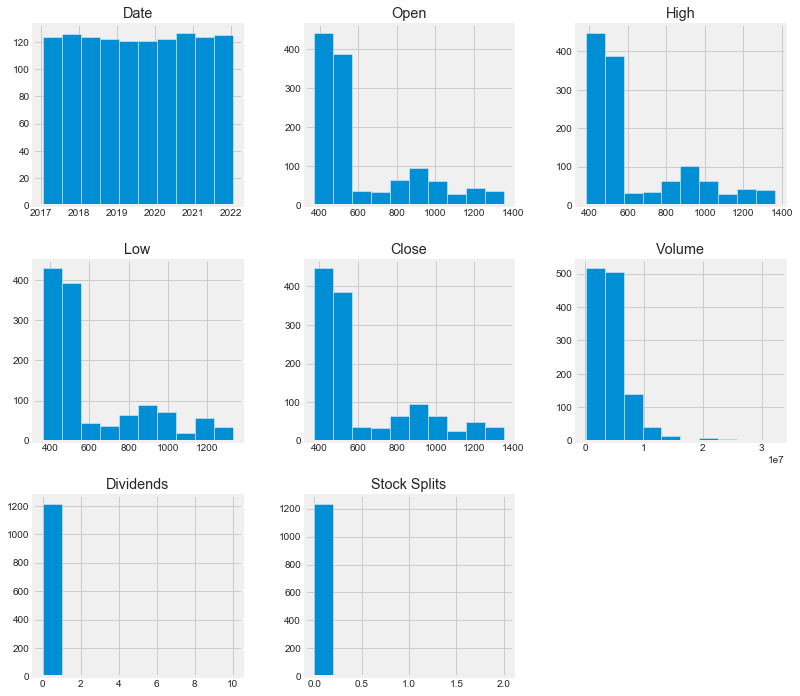

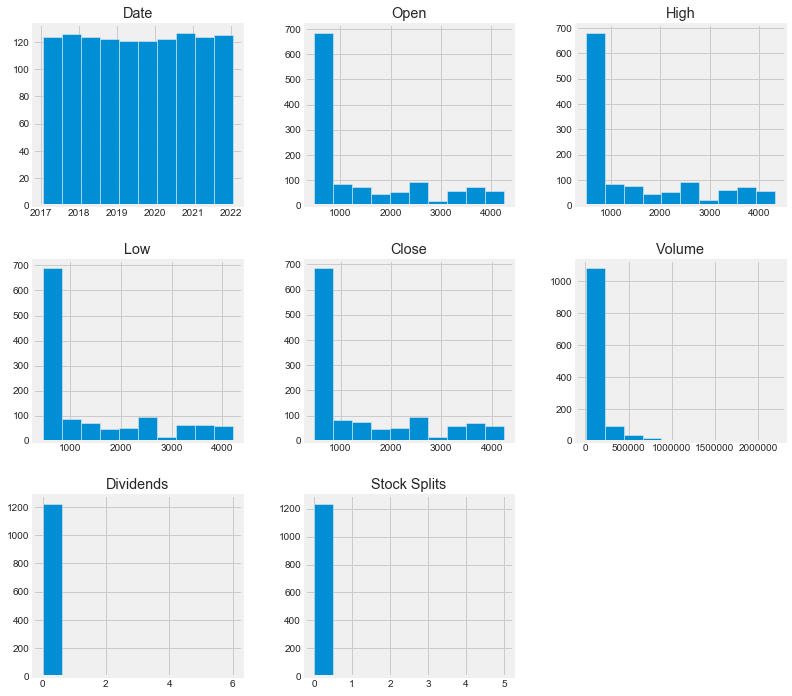

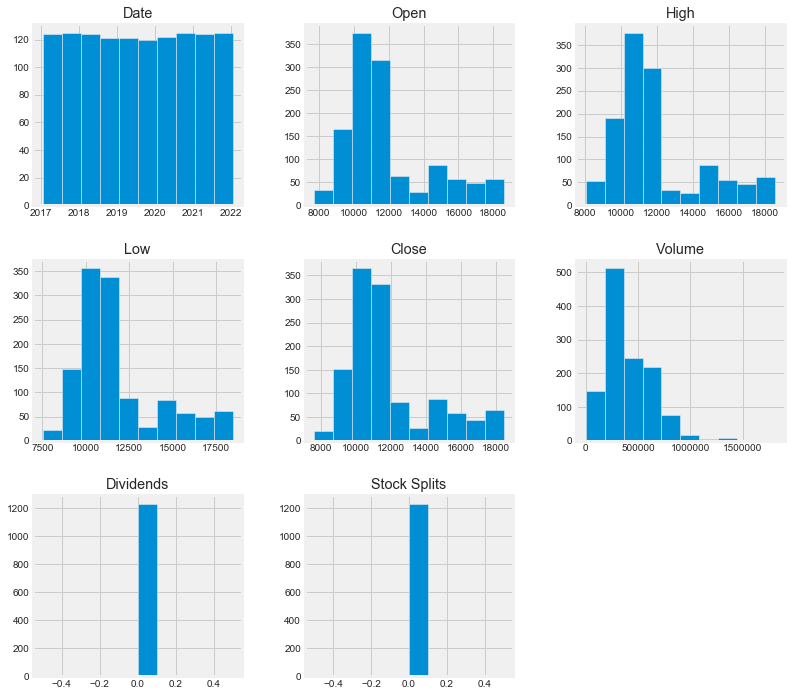

In [17]:
df.groupby("company_name").hist(figsize=(12, 12));

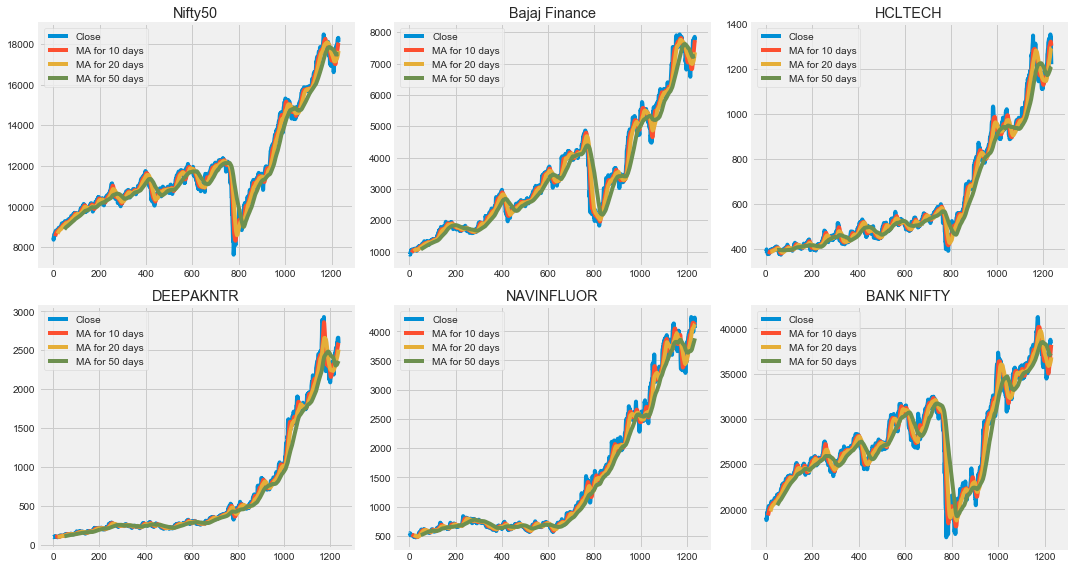

In [18]:
fig, axes = plt.subplots(nrows = 2, ncols=3)
fig.set_figheight(8)
fig.set_figwidth(15)
company_list[0][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Nifty50')

company_list[1][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Bajaj Finance')

company_list[2][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,2])
axes[0,2].set_title('HCLTECH')

company_list[3][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('DEEPAKNTR')

company_list[4][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('NAVINFLUOR')

company_list[5][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,2])
axes[1,2].set_title('BANK NIFTY')
fig.tight_layout()


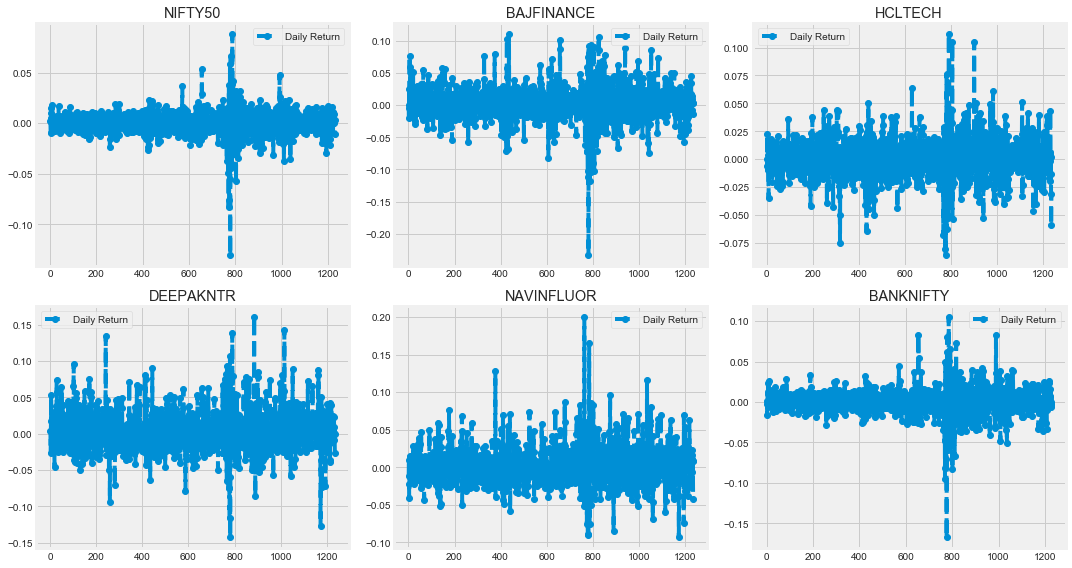

In [19]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_figheight(8)
fig.set_figwidth(15)

company_list[0]['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('NIFTY50')

company_list[1]['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('BAJFINANCE')

company_list[2]['Daily Return'].plot(ax=axes[0,2], legend=True, linestyle='--', marker='o')
axes[0,2].set_title('HCLTECH')

company_list[3]['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('DEEPAKNTR')

company_list[4]['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('NAVINFLUOR')

company_list[5]['Daily Return'].plot(ax=axes[1,2], legend=True, linestyle='--', marker='o')
axes[1,2].set_title('BANKNIFTY')

fig.tight_layout()

/Users/lostman/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lostman/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/lostman/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/lostman/opt/anaconda3/lib/python3

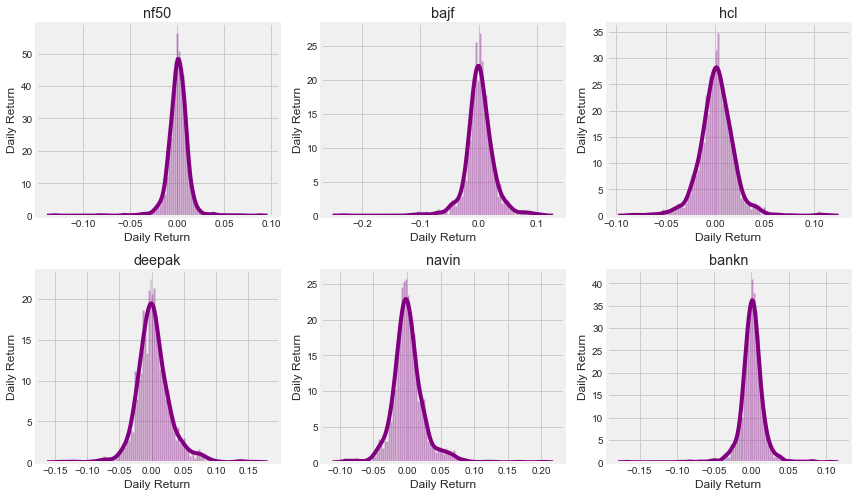

In [20]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 3, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
#AAPL['Daily Return'].hist()
plt.tight_layout()

In [21]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Close']

# Let's take a quick look
closing_df.head()  

Symbols,^NSEI,BAJFINANCE.NS,HCLTECH.NS,DEEPAKNTR.NS,NAVINFLUOR.NS,^NSEBANK
Date,,,,,,
2021-01-19,14521.150391,4959.149902,983.849976,1014.500000,2528.550049,32424.849609
2021-01-20,14644.700195,4981.950195,999.250000,1009.299988,2528.649902,32543.699219
2021-01-21,14590.349609,5118.299805,993.299988,1013.150024,2544.000000,32186.900391
2021-01-22,14371.900391,4972.549805,985.799988,1001.000000,2495.800049,31167.250000
2021-01-25,14238.900391,4908.700195,947.500000,986.200012,2568.699951,31198.400391


In [22]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,^NSEI,BAJFINANCE.NS,HCLTECH.NS,DEEPAKNTR.NS,NAVINFLUOR.NS,^NSEBANK
Date,,,,,,
2021-01-19,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-20,0.008508,0.004598,0.015653,-0.005126,0.000039,0.003665
2021-01-21,-0.003711,0.027369,-0.005954,0.003815,0.006070,-0.010964
2021-01-22,-0.014972,-0.028476,-0.007551,-0.011992,-0.018947,-0.031679
2021-01-25,-0.009254,-0.012840,-0.038852,-0.014785,0.029209,0.000999


/Users/lostman/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


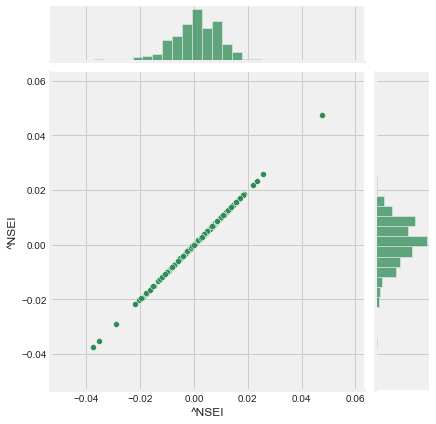

In [23]:
sns.jointplot('^NSEI', '^NSEI', tech_rets, kind='scatter', color='seagreen')

/Users/lostman/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


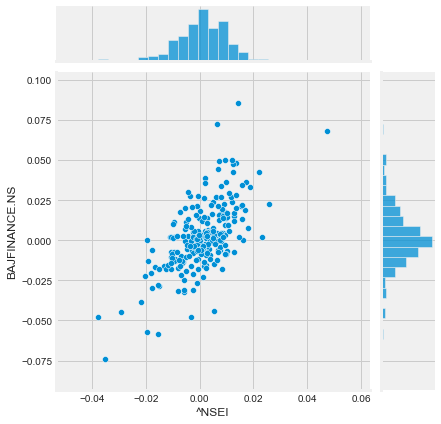

In [24]:
sns.jointplot('^NSEI', 'BAJFINANCE.NS', tech_rets, kind='scatter')

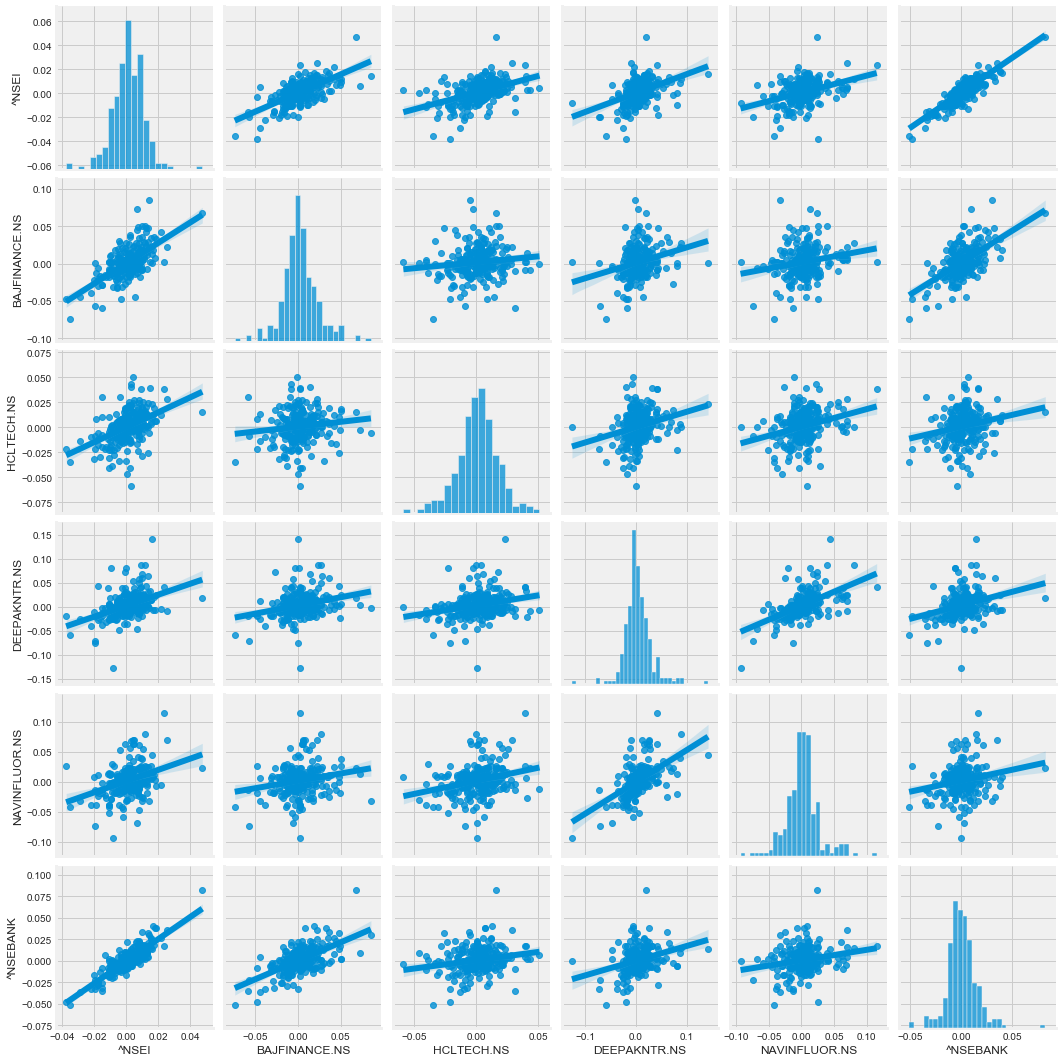

In [25]:
sns.pairplot(tech_rets, kind='reg')

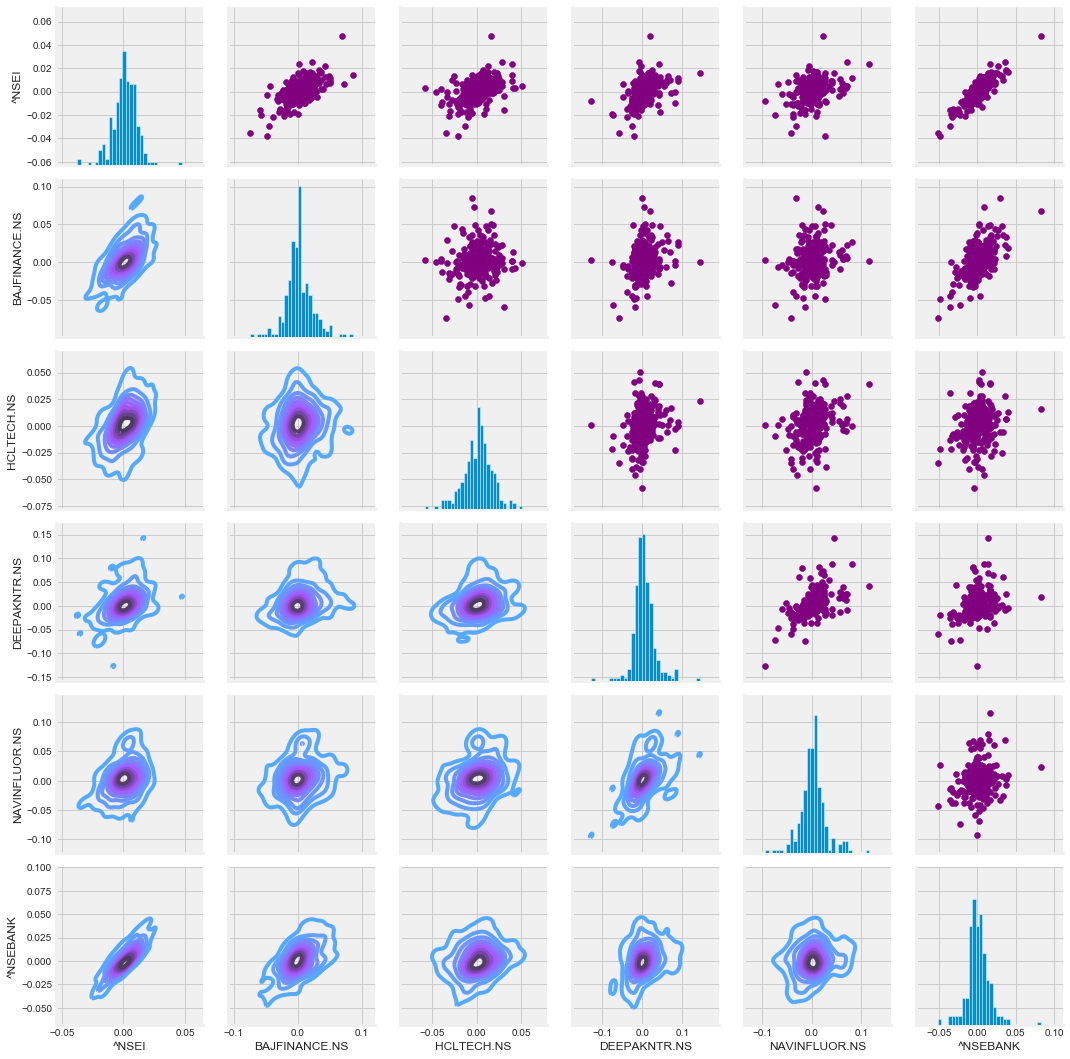

In [26]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

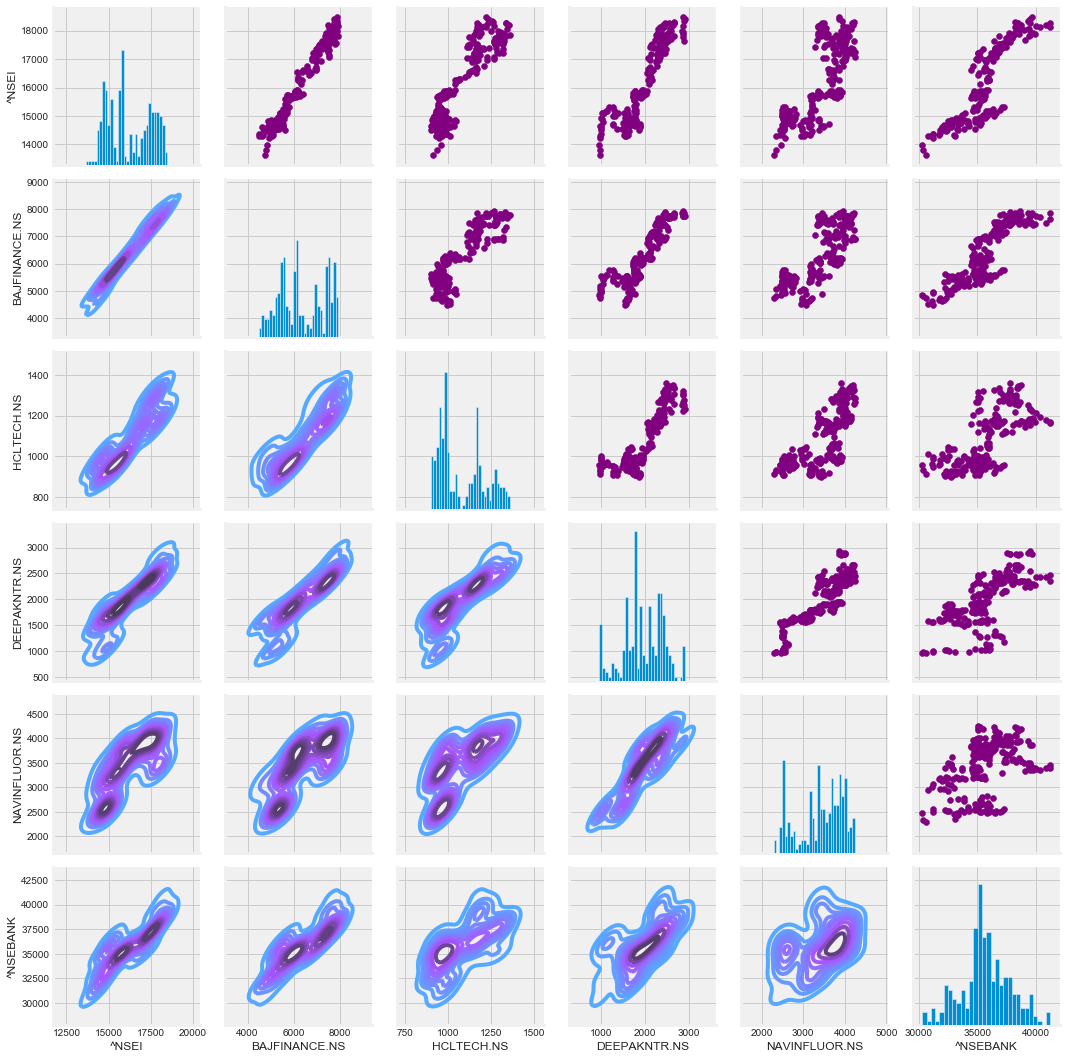

In [27]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

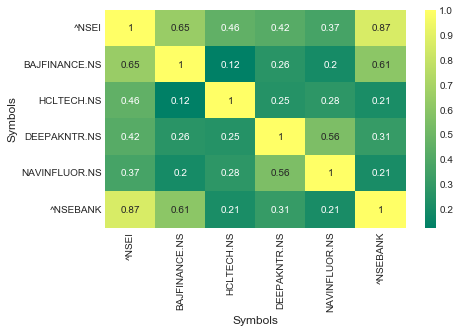

In [28]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

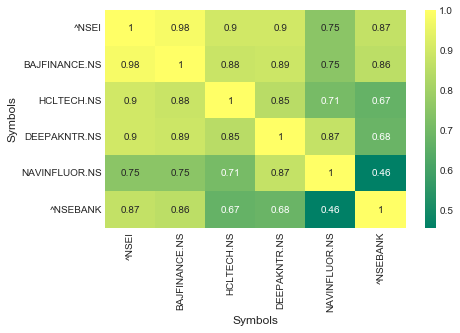

In [29]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

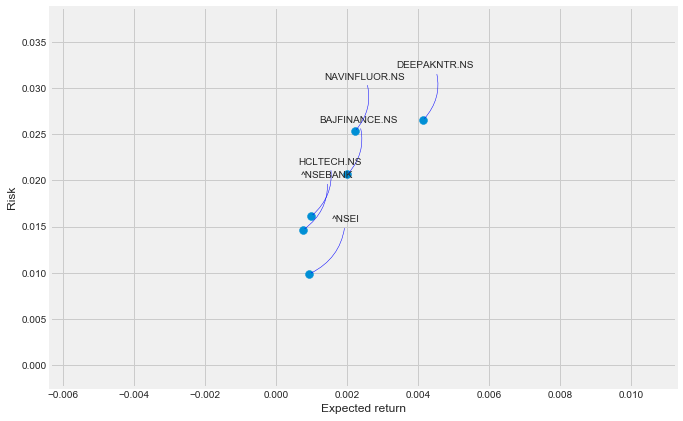

In [30]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [31]:
# Get the stock quote
df = DataReader('^NSEI', data_source='yahoo', start='2017-01-17', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-17,8440.900391,8378.299805,8415.049805,8398.000000,122000.0,8398.000000
2017-01-18,8460.299805,8397.400391,8403.849609,8417.000000,163800.0,8417.000000
2017-01-19,8445.150391,8404.049805,8418.400391,8435.099609,165900.0,8435.099609
2017-01-20,8423.650391,8340.950195,8404.349609,8349.349609,202600.0,8349.349609
2017-01-23,8404.150391,8327.200195,8329.599609,8391.500000,195000.0,8391.500000
...,...,...,...,...,...,...
2022-01-12,18227.949219,18128.800781,18170.400391,18212.349609,245000.0,18212.349609
2022-01-13,18272.250000,18163.800781,18257.000000,18257.800781,303700.0,18257.800781
2022-01-14,18286.949219,18119.650391,18185.000000,18255.750000,229500.0,18255.750000


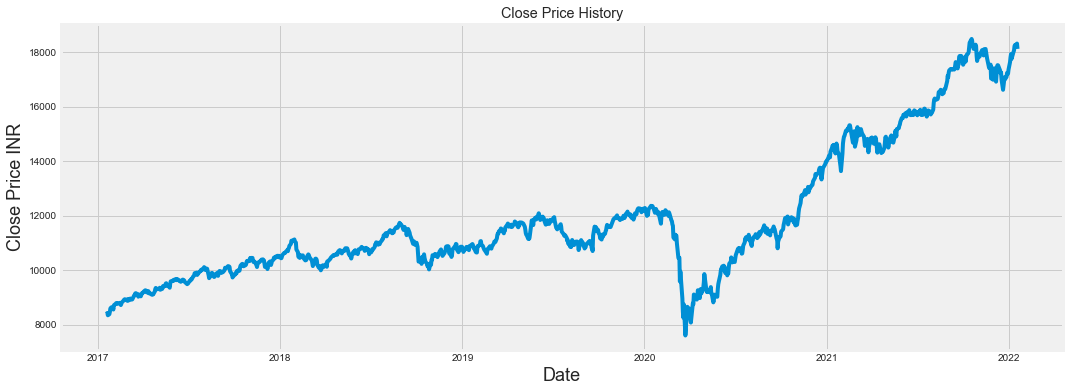

In [32]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.show()

In [33]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1171

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.07249144],
       [0.07423988],
       [0.07590547],
       ...,
       [0.97963515],
       [0.98445254],
       [0.96650348]])

In [35]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.07249144, 0.07423988, 0.07590547, 0.06801446, 0.07189328,
       0.07965084, 0.09133323, 0.09487613, 0.09409393, 0.08751884,
       0.10179172, 0.10343431, 0.10405088, 0.10958145, 0.10656769,
       0.1066367 , 0.10749718, 0.10889128, 0.10994955, 0.10877625,
       0.1025555 , 0.10746033, 0.11148177, 0.11677312, 0.11940953,
       0.12116265, 0.12232211, 0.11838353, 0.11680987, 0.12290184,
       0.11866418, 0.11846171, 0.12452609, 0.12300312, 0.12092334,
       0.12117182, 0.12186658, 0.13589556, 0.13569309, 0.14203354,
       0.14261785, 0.13956266, 0.13907037, 0.13069166, 0.13583113,
       0.13782805, 0.132049  , 0.13716547, 0.14112247, 0.14387859,
       0.14387859, 0.14977726, 0.15228957, 0.15199507, 0.14613775,
       0.14458719, 0.14969907, 0.14661171, 0.14176664, 0.14070837])]
[0.13756582279527563]

[array([0.07249144, 0.07423988, 0.07590547, 0.06801446, 0.07189328,
       0.07965084, 0.09133323, 0.09487613, 0.09409393, 0.08751884,
       0.10179172, 0.10343431, 0.10

In [36]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Using TensorFlow backend.


Epoch 1/1
1111/1111 [==============================] - 889s 800ms/step - loss: 0.0026


In [37]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

380.00307909628924

/Users/lostman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


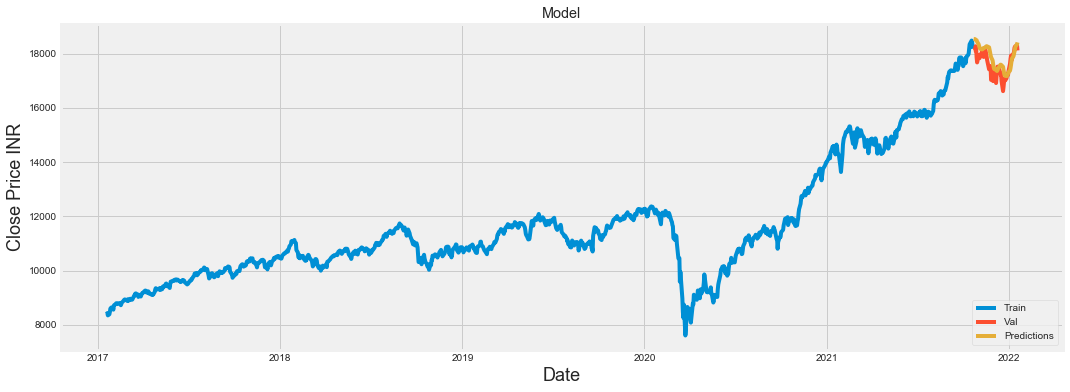

In [40]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [39]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-10-22,18114.900391,18535.964844
2021-10-25,18125.400391,18528.308594
2021-10-26,18268.400391,18505.990234
2021-10-27,18210.949219,18497.181641
2021-10-28,17857.250000,18488.332031
...,...,...
2022-01-12,18212.349609,18076.986328
2022-01-13,18257.800781,18169.474609
2022-01-14,18255.750000,18260.449219
